# Understanding the worldwide impact of Covid-19

## Hypothesis 1: More diversed exports reduced the impact of COVID19 on the economy
## Hypothesis 2: Countries with more young people had less deaths from covid


In [344]:
#import necessary libraries
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import requests
from io import StringIO

In [345]:
#import GDP growth dataset
df = pd.read_csv('https://stats.oecd.org/sdmx-json/data/DP_LIVE/.QGDP.TOT.PC_CHGPP.Q/OECD?contentType=csv&detail=code&separator=comma&csv-lang=en&startPeriod=2020-Q1&endPeriod=2020-Q3', 
                     usecols = ['LOCATION', 'TIME', 'Value'])

#rename columns for merging (LOCATION) and readability (other columns)
df = df.rename(columns = {'LOCATION':'Country Code', 'TIME':'Year-Quarter', 'Value': 'GDP Growth (%)'} )

df

,Country Code,Year-Quarter,GDP Growth (%)
0,KOR,2020-Q1,-1.281702
1,KOR,2020-Q2,-3.153852
2,KOR,2020-Q3,1.930839
3,AUS,2020-Q1,-0.262173
4,AUS,2020-Q2,-6.997136
...,...,...,...
121,ROU,2020-Q1,-0.044658
122,ROU,2020-Q2,-11.927474
123,EU27_2020,2020-Q1,-3.284640
124,EU27_2020,2020-Q2,-11.430486


In [346]:
#import covid-19 dataset
df1 = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', usecols = ['iso_code', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita'])

#rename columns for merging
df1 = df1.rename(columns = {'iso_code':'Country Code', 'location':'Country'} )

df1

,Country Code,Country,date,total_cases,total_deaths,gdp_per_capita
0,AFG,Afghanistan,2019-12-31,NaN,NaN,1803.987
1,AFG,Afghanistan,2020-01-01,NaN,NaN,1803.987
2,AFG,Afghanistan,2020-01-02,NaN,NaN,1803.987
3,AFG,Afghanistan,2020-01-03,NaN,NaN,1803.987
4,AFG,Afghanistan,2020-01-04,NaN,NaN,1803.987
...,...,...,...,...,...,...
56961,NaN,International,2020-11-11,696.0,7.0,NaN
56962,NaN,International,2020-11-12,696.0,7.0,NaN
56963,NaN,International,2020-11-13,696.0,7.0,NaN
56964,NaN,International,2020-11-14,696.0,7.0,NaN


In [347]:
#check datatype of date column 
df1.dtypes

Country Code       object
Country            object
date               object
total_cases       float64
total_deaths      float64
gdp_per_capita    float64
dtype: object

In [348]:
#convert date column to datetime
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

Country Code              object
Country                   object
date              datetime64[ns]
total_cases              float64
total_deaths             float64
gdp_per_capita           float64
dtype: object

In [349]:
#filter covid-19 dataset to give information for three days ago. Dataset is updated daily and all countries of interest do not have data same day, yesterday or two days ago
three_days_ago = date.today() - timedelta(3)
df1 = df1[df1['date'] == three_days_ago.strftime('%Y-%m-%d')] #strftime format needed to allow filtering
df1


,Country Code,Country,date,total_cases,total_deaths,gdp_per_capita
318,AFG,Afghanistan,2020-11-13,42969.0,1595.0,1803.987
570,ALB,Albania,2020-11-13,26211.0,598.0,11803.431
891,DZA,Algeria,2020-11-13,65108.0,2111.0,13913.839
1144,AND,Andorra,2020-11-13,5616.0,75.0,NaN
1383,AGO,Angola,2020-11-13,12953.0,312.0,5819.495
...,...,...,...,...,...,...
55839,YEM,Yemen,2020-11-13,2070.0,602.0,1479.147
56081,ZMB,Zambia,2020-11-13,17036.0,350.0,3689.251
56321,ZWE,Zimbabwe,2020-11-13,8696.0,255.0,1899.775
56642,OWID_WRL,World,2020-11-13,52895696.0,1295138.0,15469.207


In [350]:
#import age distribution dataset
df2 = pd.read_csv('https://apps.who.int/gho/athena/data/GHO/WHS9_86,WHS9_88,WHS9_89,WHS9_92,WHS9_96,WHS9_97,WHS9_90?filter=COUNTRY:*;REGION:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO&profile=crosstable&format=csv',
                 usecols = ['Country', 'Year', 'Population (in thousands) total', 'Population proportion under 15 (%)'])

#filter dataset to only include most recent year
df2 = df2[df2['Year'] == ' 2016'] #column has leading space
df2

,Country,Year,Population (in thousands) total,Population proportion under 15 (%)
4,Afghanistan,2016,34 656,43.9
18,Albania,2016,2926,17.7
33,Algeria,2016,40 606,29.0
47,Andorra,2016,77,14.8
59,Angola,2016,28 813,47.0
...,...,...,...,...
2708,Venezuela (Bolivarian Republic of),2016,31 568,27.9
2722,Viet Nam,2016,94 569,23.1
2737,Yemen,2016,27 584,40.3
2751,Zambia,2016,16 591,45.1


In [351]:
#rename certain countries for merging purposes. Countries that needed changing were determined by code at the end of notebook
for i in df2.index: 
    if df2.at[i,'Country'] == 'United Kingdom of Great Britain and Northern Ireland':
        df2.at[i,'Country'] = 'United Kingdom'
    if df2.at[i,'Country'] == 'Republic of Korea':
        df2.at[i,'Country'] = 'South Korea'
    if df2.at[i,'Country'] == 'United States of America':
        df2.at[i,'Country'] = 'United States'
    if df2.at[i,'Country'] == 'Czechia':
        df2.at[i,'Country'] = 'Czech Republic'

In [352]:
#import export diversification index file
#this is the google drive URL that I set to share in my google drive

orig_url = "https://drive.google.com/file/d/12VP33Miuj7zl3EtcO3Zab2KMV3c4444S/view?usp=sharing"

#this is to remove all the directory information and only extract the alpha numerical file identifier of the code

file_id = orig_url.split('/')[-2]

#this is to add the "export syntax to the alpha numierical file_id

dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

#turn this object into a raw string

url = requests.get(dwn_url).text

csv_raw = StringIO(url)

#use panda to load the raw csv string

df3 = pd.read_csv(csv_raw, usecols =  ['Country Name', 'Indicator Name', '2014'])

#filter dataset to only include Export Diversification Index values
df3 = df3[df3['Indicator Name'] == 'Export Diversification Index']

#rename column for merging(Country Name) and readability (2014)
df3 = df3.rename(columns = {'Country Name':'Country', '2014':'Economic Diversification Index (2014)'} )

df3

,Country,Indicator Name,Economic Diversification Index (2014)
2,Aruba,Export Diversification Index,4.709233
5,"Afghanistan, Islamic Republic of",Export Diversification Index,3.287116
8,Angola,Export Diversification Index,6.212767
11,Anguilla,Export Diversification Index,4.047620
14,Albania,Export Diversification Index,2.944663
...,...,...,...
589,Greenland,Export Diversification Index,5.091697
592,Guatemala,Export Diversification Index,2.348547
593,Paraguay,Export Diversification Index,3.757314
596,French Territories: French Polynesia,Export Diversification Index,4.296948


In [353]:
#rename certain countries for merging purposes. Countries that needed changing were determined by code at the end of notebook
for i in df3.index: 
    if df3.at[i,'Country'] == 'China, P.R.: Mainland':
        df3.at[i,'Country'] = 'China'
    if df3.at[i,'Country'] == 'Korea, Republic of':
        df3.at[i,'Country'] = 'South Korea'
    if df3.at[i,'Country'] == 'Slovak Republic':
        df3.at[i,'Country'] = 'Slovakia'

In [354]:
#merge datasets that have country codes, only including countries with available GDP information
merge_1 = df.merge(df1, how = 'inner', on='Country Code')
merge_1

,Country Code,Year-Quarter,GDP Growth (%),Country,date,total_cases,total_deaths,gdp_per_capita
0,KOR,2020-Q1,-1.281702,South Korea,2020-11-13,28133.0,488.0,35938.374
1,KOR,2020-Q2,-3.153852,South Korea,2020-11-13,28133.0,488.0,35938.374
2,KOR,2020-Q3,1.930839,South Korea,2020-11-13,28133.0,488.0,35938.374
3,AUS,2020-Q1,-0.262173,Australia,2020-11-13,27698.0,907.0,44648.710
4,AUS,2020-Q2,-6.997136,Australia,2020-11-13,27698.0,907.0,44648.710
...,...,...,...,...,...,...,...,...
107,SAU,2020-Q2,-4.906523,Saudi Arabia,2020-11-13,352160.0,5605.0,49045.411
108,BGR,2020-Q1,0.445051,Bulgaria,2020-11-13,90725.0,1970.0,18563.307
109,BGR,2020-Q2,-10.069032,Bulgaria,2020-11-13,90725.0,1970.0,18563.307
110,ROU,2020-Q1,-0.044658,Romania,2020-11-13,334236.0,8510.0,23313.199


In [355]:
#merge datasets that do not have country codes
merge_2 = df2.merge(df3, how = 'inner', on='Country')
merge_2

,Country,Year,Population (in thousands) total,Population proportion under 15 (%),Indicator Name,Economic Diversification Index (2014)
0,Albania,2016,2926,17.7,Export Diversification Index,2.944663
1,Algeria,2016,40 606,29.0,Export Diversification Index,5.307600
2,Andorra,2016,77,14.8,Export Diversification Index,2.901503
3,Angola,2016,28 813,47.0,Export Diversification Index,6.212767
4,Antigua and Barbuda,2016,101,24.2,Export Diversification Index,5.521150
...,...,...,...,...,...,...
155,Uruguay,2016,3444,21.2,Export Diversification Index,2.893649
156,Uzbekistan,2016,31 447,28.0,Export Diversification Index,3.202745
157,Vanuatu,2016,270,36.1,Export Diversification Index,4.411869
158,Zambia,2016,16 591,45.1,Export Diversification Index,4.610315


In [356]:
#merge combine all datasets together, only including countries with GDP data available
merge_3 = merge_1.merge(merge_2, how = 'inner', on = 'Country')
merge_3 = merge_3.drop(columns = ['Indicator Name', 'Year', 'date']) #these columns are not needed
merge_3

,Country Code,Year-Quarter,GDP Growth (%),Country,total_cases,total_deaths,gdp_per_capita,Population (in thousands) total,Population proportion under 15 (%),Economic Diversification Index (2014)
0,KOR,2020-Q1,-1.281702,South Korea,28133.0,488.0,35938.374,50 792,13.7,2.418728
1,KOR,2020-Q2,-3.153852,South Korea,28133.0,488.0,35938.374,50 792,13.7,2.418728
2,KOR,2020-Q3,1.930839,South Korea,28133.0,488.0,35938.374,50 792,13.7,2.418728
3,AUS,2020-Q1,-0.262173,Australia,27698.0,907.0,44648.710,24 126,18.9,3.185794
4,AUS,2020-Q2,-6.997136,Australia,27698.0,907.0,44648.710,24 126,18.9,3.185794
...,...,...,...,...,...,...,...,...,...,...
105,SAU,2020-Q2,-4.906523,Saudi Arabia,352160.0,5605.0,49045.411,32 276,25.5,5.305733
106,BGR,2020-Q1,0.445051,Bulgaria,90725.0,1970.0,18563.307,7131,14.1,2.100591
107,BGR,2020-Q2,-10.069032,Bulgaria,90725.0,1970.0,18563.307,7131,14.1,2.100591
108,ROU,2020-Q1,-0.044658,Romania,334236.0,8510.0,23313.199,19 778,15.3,2.083770


In [357]:
merge_3.dtypes

Country Code                              object
Year-Quarter                              object
GDP Growth (%)                           float64
Country                                   object
total_cases                              float64
total_deaths                             float64
gdp_per_capita                           float64
Population (in thousands) total           object
Population proportion under 15 (%)       float64
Economic Diversification Index (2014)    float64
dtype: object

In [358]:
merge_3['Population (in thousands) total'] = merge_3['Population (in thousands) total'].str.replace(' ', '').astype(float)

In [359]:
merge_3

,Country Code,Year-Quarter,GDP Growth (%),Country,total_cases,total_deaths,gdp_per_capita,Population (in thousands) total,Population proportion under 15 (%),Economic Diversification Index (2014)
0,KOR,2020-Q1,-1.281702,South Korea,28133.0,488.0,35938.374,50792.0,13.7,2.418728
1,KOR,2020-Q2,-3.153852,South Korea,28133.0,488.0,35938.374,50792.0,13.7,2.418728
2,KOR,2020-Q3,1.930839,South Korea,28133.0,488.0,35938.374,50792.0,13.7,2.418728
3,AUS,2020-Q1,-0.262173,Australia,27698.0,907.0,44648.710,24126.0,18.9,3.185794
4,AUS,2020-Q2,-6.997136,Australia,27698.0,907.0,44648.710,24126.0,18.9,3.185794
...,...,...,...,...,...,...,...,...,...,...
105,SAU,2020-Q2,-4.906523,Saudi Arabia,352160.0,5605.0,49045.411,32276.0,25.5,5.305733
106,BGR,2020-Q1,0.445051,Bulgaria,90725.0,1970.0,18563.307,7131.0,14.1,2.100591
107,BGR,2020-Q2,-10.069032,Bulgaria,90725.0,1970.0,18563.307,7131.0,14.1,2.100591
108,ROU,2020-Q1,-0.044658,Romania,334236.0,8510.0,23313.199,19778.0,15.3,2.083770


In [360]:
merge_3['deaths_per_1000_cases'] = (merge_3['total_deaths'] / merge_3['total_cases'])*1000
merge_3['deaths_per_1000_people'] = (merge_3['total_deaths'] / merge_3['Population (in thousands) total'])*1000
merge_3

,Country Code,Year-Quarter,GDP Growth (%),Country,total_cases,total_deaths,gdp_per_capita,Population (in thousands) total,Population proportion under 15 (%),Economic Diversification Index (2014),deaths_per_1000_cases,deaths_per_1000_people
0,KOR,2020-Q1,-1.281702,South Korea,28133.0,488.0,35938.374,50792.0,13.7,2.418728,17.346177,9.607812
1,KOR,2020-Q2,-3.153852,South Korea,28133.0,488.0,35938.374,50792.0,13.7,2.418728,17.346177,9.607812
2,KOR,2020-Q3,1.930839,South Korea,28133.0,488.0,35938.374,50792.0,13.7,2.418728,17.346177,9.607812
3,AUS,2020-Q1,-0.262173,Australia,27698.0,907.0,44648.710,24126.0,18.9,3.185794,32.746047,37.594297
4,AUS,2020-Q2,-6.997136,Australia,27698.0,907.0,44648.710,24126.0,18.9,3.185794,32.746047,37.594297
...,...,...,...,...,...,...,...,...,...,...,...,...
105,SAU,2020-Q2,-4.906523,Saudi Arabia,352160.0,5605.0,49045.411,32276.0,25.5,5.305733,15.916061,173.658446
106,BGR,2020-Q1,0.445051,Bulgaria,90725.0,1970.0,18563.307,7131.0,14.1,2.100591,21.713971,276.258589
107,BGR,2020-Q2,-10.069032,Bulgaria,90725.0,1970.0,18563.307,7131.0,14.1,2.100591,21.713971,276.258589
108,ROU,2020-Q1,-0.044658,Romania,334236.0,8510.0,23313.199,19778.0,15.3,2.083770,25.461051,430.276064


## Analysis 

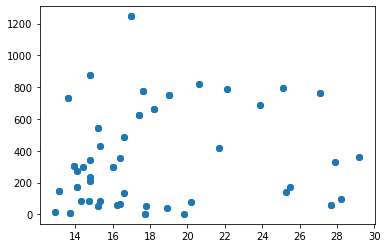

In [361]:
plt.scatter(merge_3['Population proportion under 15 (%)'], merge_3['deaths_per_1000_people'])

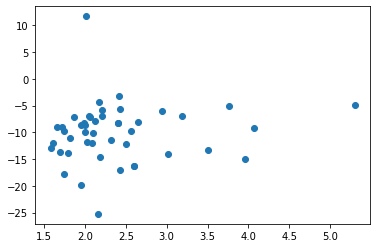

In [362]:
temp = merge_3[merge_3['Year-Quarter']=='2020-Q2']
plt.scatter(temp['Economic Diversification Index (2014)'], temp['GDP Growth (%)'])

### Code for determining country names that need changing

These codes were run after the final merge and before the 'change country name' codes

In [363]:
#finds countries were there is available GDP data and is not included in the final merge
lst = [x for x in merge_1['Country Code'].unique() if not x in merge_3['Country Code'].unique() ]
lst

['RUS']

In [364]:
#eyeball check to see if some countries exist in both datasets but have different names
#only checking df2 and df3 because df and df1 are merged by country code, which is standardized worldwide

#generates list of countries with age distribution data but not export diversification data
lst2 = [x for x in df2['Country'].unique() if not x in df3['Country'].unique() ]
lst2

['Afghanistan',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bolivia (Plurinational State of)',
 'Congo',
 'Cook Islands',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Eswatini',
 'Gambia',
 'Iran (Islamic Republic of)',
 'Kyrgyzstan',
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Monaco',
 'Montenegro',
 'Nauru',
 'Niue',
 'Palau',
 'Republic of Moldova',
 'North Macedonia',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'San Marino',
 'Serbia',
 'Timor-Leste',
 'United Republic of Tanzania',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam',
 'Yemen']

In [365]:
#generates list of countries with age distribution data but not export diversification data
lst2 = [x for x in df3['Country'].unique() if not x in df2['Country'].unique() ]
lst2

['Aruba',
 'Afghanistan, Islamic Republic of',
 'Anguilla',
 'Netherlands Antilles',
 'Vietnam',
 'Yemen, Republic of',
 'Kyrgyz Republic',
 'Tanzania',
 'Armenia, Republic of',
 'Gibraltar',
 'Gambia, The',
 'Montserrat',
 'Azerbaijan, Republic of',
 'St. Vincent and the Grenadines',
 'Bahrain, Kingdom of',
 'Bahamas, The',
 'Belgium-Luxembourg',
 'Congo, Democratic Republic of',
 'China, P.R.: Macao',
 "Cote d'Ivoire",
 'Faroe Islands',
 'Iran, Islamic Republic of',
 'Moldova',
 'Marshall Islands, Republic of',
 'Serbia and Montenegro',
 'St. Kitts and Nevis',
 'Congo, Republic of',
 'China, P.R.: Hong Kong',
 'St. Lucia',
 "Korea, Democratic People's Rep. of",
 'North Macedonia, Republic of',
 'Swaziland',
 'Venezuela, Republica Bolivariana de',
 'Virgin Islands, British',
 'Bermuda',
 'Bolivia',
 'Cayman Islands',
 'French Territories: New Caledonia',
 'Greenland',
 'French Territories: French Polynesia']